In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
pd.options.display.max_rows = 10
plt.style.use("ggplot")

## BoxPlot

* 이상치 확인 가능
* skewness 확인 가능

### seaborn boxplot & violinplot

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


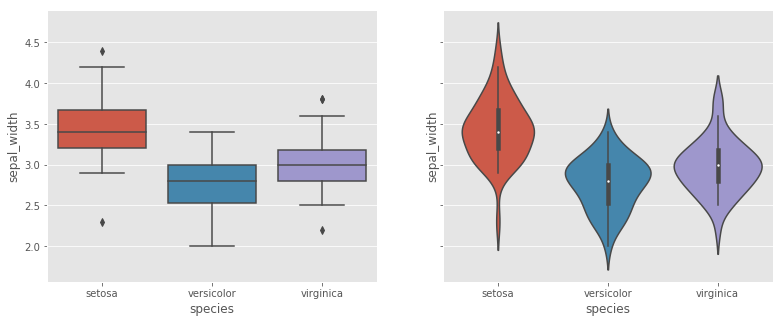

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharey=True)
sns.boxplot(x='species', y='sepal_width', data=iris, ax=axes[0])
# viloin plot
## histogram을 함께 표현한다. 이상치는 약간 보기 어려움
sns.violinplot(x='species', y='sepal_width', data=iris, ax=axes[1]) 

#### hue 활용

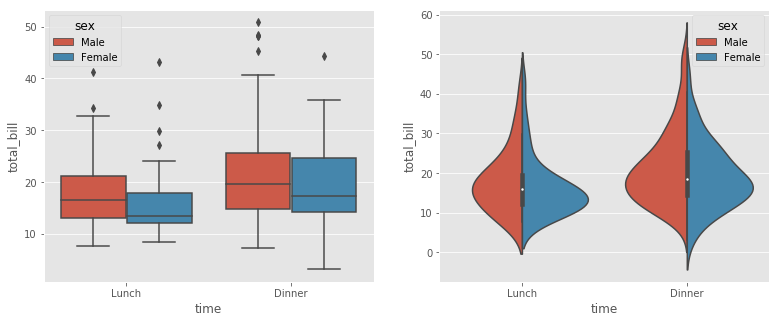

In [6]:
tips = sns.load_dataset('tips')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.boxplot(x='time', y='total_bill', hue='sex', data=tips, ax=axes[0])
# viloin plot
## split: 반반 색으로 분리 여부
sns.violinplot(x='time', y='total_bill', hue='sex', split=True, data=tips, ax=axes[1])

#### 참고 : orient 파라미터 활용

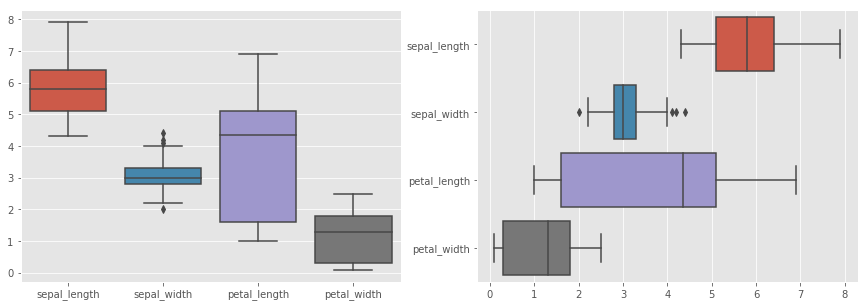

In [4]:
# 여러 컬럼들의 value의 min, max가 비슷한 범위일 때, x축, y축 지정없이 사용할 수 있음
# 여기서 orient는 컬럼이 x축 또는 y축에 위치하는 지를 조정
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.boxplot(data=iris, orient='v', ax=axes[0]) # v : vertical ( x축 )
sns.boxplot(data=iris, orient='h', ax=axes[1]) # h : horizontal ( y축 )

**x축, y축 값에서 기준이 되는 컬럼을 지정할 때 orient 사용**

    - 함수 자체에서 기준 컬럼을 예측해서 사용한다. ( 숫자로 된 category 변수와 연속형 데이터를 대부분 구분 가능 )
    - 기준이 되는 축을 잘 판단하지 못할 경우 직접 지정해야 할 수도 있다.

In [5]:
# species 데이터에 LabelEncoding을 적용
species = {'setosa':0, 'versicolor':1,'virginica':2 }
iris['species'] = iris['species'].map(lambda x: species[x])

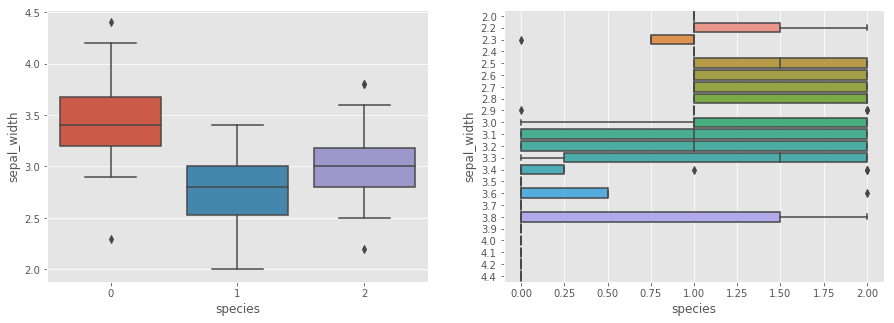

In [6]:
# x축을 기준 값으로 두려면 orient='v' y축이 기준이면 'h'
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.boxplot(data=iris, x='species', y='sepal_width', orient='v', ax=axes[0])
sns.boxplot(data=iris, x='species', y='sepal_width', orient='h', ax=axes[1]) # 잘못된 방법